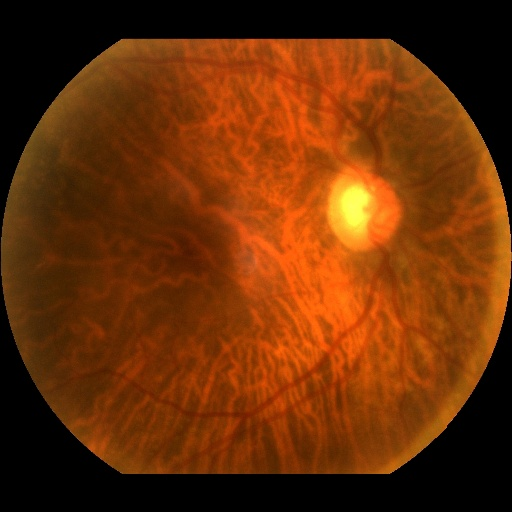

In [2]:
"""read image from requests """
from PIL import Image
import requests
from io import BytesIO

response = requests.get('https://glaucoma-website-107594336623.s3.amazonaws.com/images/EyePACS-TRAIN-NRG-2887.jpg')
img = Image.open(BytesIO(response.content))
img

In [ ]:
import json
import base64
data = json.load(open('data/test/test-process-image.json'))
image_base64 = str(data.get('file')).split(',')[1]
img = Image.open(BytesIO(base64.b64decode(image_base64)))
img

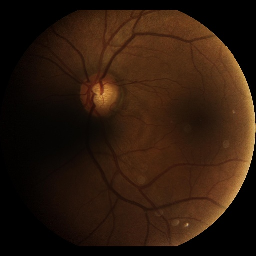

In [27]:
import tensorflow as tf
img_path = 'data/test/EyePACS-TRAIN-RG-2507.jpg'
image_size = 256
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(image_size, image_size))
img

In [34]:

import tensorflow as tf
import numpy as np
import keras
import json
import base64

MODEL_DIR = "C:/Projects/glaucoma-serverless/src/ImageProcessor/data/"
image_size = 256

# load request
data = json.load(open('data/test/test-process-image.json'))
# get base64 data
image_base64 = str(data.get('file')).split(',')[1]
# cast it to bytesio
image_path = BytesIO(base64.b64decode(image_base64))

# pass to keras
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(image_size, image_size))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize the image

# load the modal
model = keras.models.load_model(f'./data/pretrained2.h5')
model.load_weights(f'./data/val-best.h5')

# Make predictions
predictions = model.predict(img_array)
print(predictions)

1/1 [==============================] - 1s 1s/step
[[0.4872389]]


In [2]:
import json
import patient_service
# load request
data = json.load(open('data/test/test-process-image.json'))
result = patient_service.process_image_prediction(data)
result

EyePACS-TRAIN-NRG-2887.jpg ---> cb86b7b4-8d1f-4a7e-aa9f-2099e2fb8f55.jpg
1/1 [==============================] - 1s 1s/step


{'success': True,
 'message': 'Processed image file name cb86b7b4-8d1f-4a7e-aa9f-2099e2fb8f55.jpg',
 'prediction': array([[0.4872389]], dtype=float32),
 'fileName': 'cb86b7b4-8d1f-4a7e-aa9f-2099e2fb8f55.jpg'}